In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Wrangling

In [2]:
df = pd.read_csv("USvideos.csv")
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [3]:
# Checking Null Values
df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

In [4]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [5]:
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [3]:
df1 = df.drop(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'], axis=1) # Deleting column
df1.head()

,views,likes,dislikes,comment_count
0,748374,57527,2966,15954
1,2418783,97185,6146,12703
2,3191434,146033,5339,8181
3,343168,10172,666,2146
4,2095731,132235,1989,17518


# Correlation:

<AxesSubplot:>

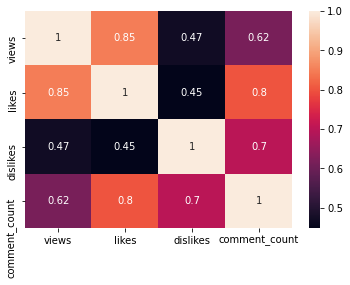

In [7]:
corr = df1.corr()
sns.heatmap(corr, annot=True)

# Splitting data into train and test

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
x = df1[['views', 'dislikes', 'comment_count']]
y = df1['likes']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=3)

# Multiple Linear Regression:

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics

In [11]:
lm = LinearRegression()
lm.fit(x_train, y_train)      # Fitting model with x_train and y_train
lm_pred = lm.predict(x_test)  # Predicting the results
print('RMSE:', np.sqrt(mean_squared_error(y_test, lm_pred, squared=False)))
print('r2 score: %.2f' % r2_score(y_test, lm_pred))
print("Accuracy :",lm.score(x_test, y_test))

RMSE: 272.56266438517713
r2 score: 0.89
Accuracy : 0.8914748717455828


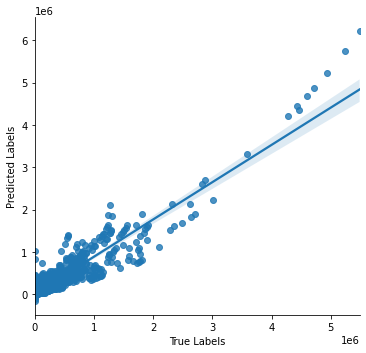

In [12]:
labels = {'True Labels': y_test, 'Predicted Labels': lm_pred}
df_lm = pd.DataFrame(data = labels)
sns.lmplot(x='True Labels', y= 'Predicted Labels', data = df_lm)

# XGBoost Regressor

In [7]:
from xgboost import XGBRegressor

### Simple XGBoost

In [14]:
xgb = XGBRegressor()
xgb.fit(x_train, y_train)       # Fitting model with x_train and y_train
xgb_pred = xgb.predict(x_test)  # Predicting the results
print('RMSE:', np.sqrt(mean_squared_error(y_test, xgb_pred, squared=False)))
print('r2 score: %.2f' % r2_score(y_test, xgb_pred))
print("Accuracy :",xgb.score(x_test, y_test))

RMSE: 229.42993595088862
r2 score: 0.95
Accuracy : 0.9455164773209144


C:\Users\Sanket\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\Sanket\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


### Tuning XGBoost

In [15]:
xgb = XGBRegressor(n_estimators=5000, learning_rate=0.001)
xgb.fit(x_train, y_train)       # Fitting model with x_train and y_train
xgb_pred = xgb.predict(x_test)  # Predicting the results
print('RMSE:', np.sqrt(mean_squared_error(y_test, xgb_pred, squared=False)))
print('r2 score: %.2f' % r2_score(y_test, xgb_pred))
print("Accuracy :",xgb.score(x_test, y_test))

C:\Users\Sanket\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
C:\Users\Sanket\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


RMSE: 227.84321905495972
r2 score: 0.95
Accuracy : 0.9470081263237853


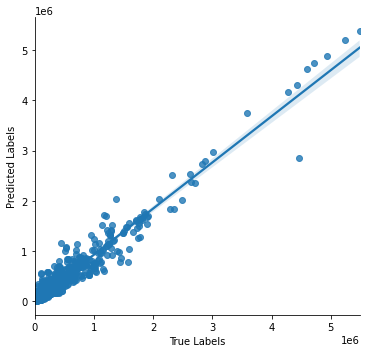

In [16]:
labels_xgb = {'True Labels': y_test, 'Predicted Labels': xgb_pred}
df_xgb = pd.DataFrame(data = labels_xgb)
sns.lmplot(x='True Labels', y= 'Predicted Labels', data = df_xgb)

# Random Forest

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

### Simple Random Forest

In [12]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)       # Fitting model with x_train and y_train
rf_pred = rf.predict(x_test)   # Predicting the results
print('RMSE:', np.sqrt(mean_squared_error(y_test, rf_pred, squared=False)))
print('r2 score: %.2f' % r2_score(y_test, rf_pred))
print("Accuracy :",rf.score(x_test, y_test))

RMSE: 223.13225266219845
r2 score: 0.95
Accuracy : 0.951256776830813


### Hyperparameter Tuning Random Forest

In [10]:
nEstimator = [140,160,180,200,220] 
depth = [10,15,20,25,30]

RF = RandomForestRegressor()
hyperParam = [{'n_estimators':nEstimator,'max_depth': depth}]

gsv = GridSearchCV(RF,hyperParam,cv=5,verbose=1,scoring='r2',n_jobs=-1)
gsv.fit(x_train, y_train)

print("Best HyperParameter: ",gsv.best_params_)
scores = gsv.cv_results_['mean_test_score'].reshape(len(nEstimator),len(depth))
maxDepth=gsv.best_params_['max_depth']
nEstimators=gsv.best_params_['n_estimators']

model = RandomForestRegressor(n_estimators = nEstimators,max_depth=maxDepth)
model.fit(x_train, y_train)        # Fitting model with x_train and y_train

# Predicting the results:
rf_pred_tune = model.predict(x_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, rf_pred_tune, squared=False)))
print('r2 score: %.2f' % r2_score(y_test, rf_pred_tune))
print("Accuracy :",model.score(x_test, y_test))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best HyperParameter:  {'max_depth': 30, 'n_estimators': 180}
RMSE: 221.66007428029008
r2 score: 0.95
Accuracy : 0.9525304907711472


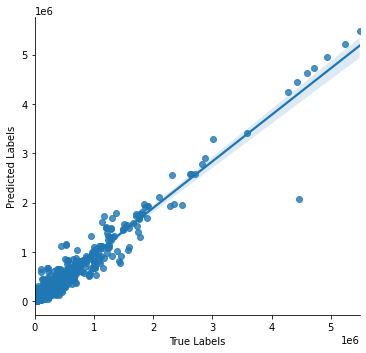

In [11]:
labels_rf = {'True Labels': y_test, 'Predicted Labels': rf_pred_tune}
df_rf = pd.DataFrame(data = labels_rf)
sns.lmplot(x='True Labels', y= 'Predicted Labels', data = df_rf)